In [ ]:
pip install wordcloud matplotlib nltk textblob


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


=== TEXT ANALYSIS SUMMARY ===
Total Words (filtered): 30
Unique Words: 29
Average Word Length: 8.3
Lexical Diversity: 0.967
Sentiment Polarity: 0.077
Subjectivity: 0.613

Top 10 Most Common Words:
learning: 2
artificial: 1
intelligence: 1
machine: 1
transforming: 1
industries: 1
across: 1
globe: 1
autonomous: 1
vehicles: 1


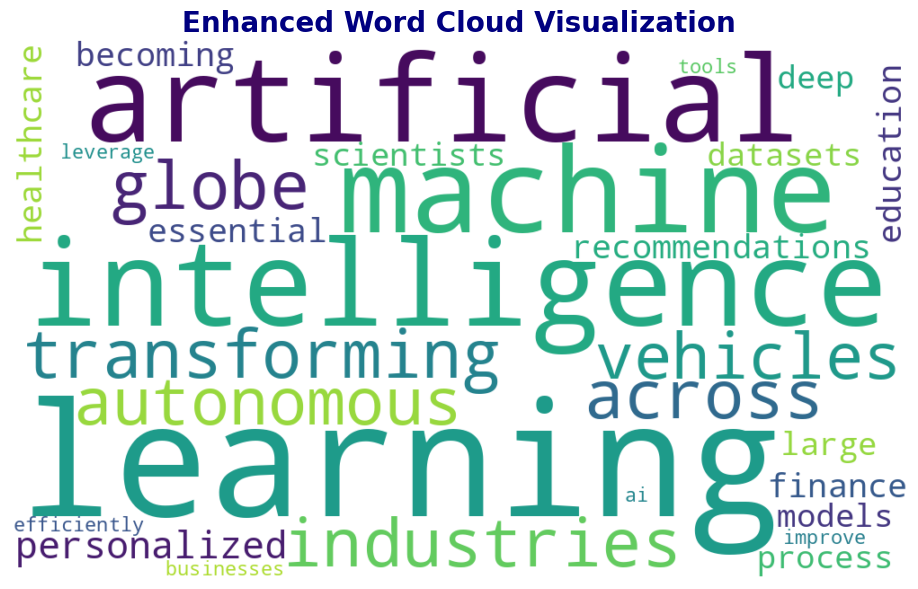

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk
from collections import Counter

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

# Input text
text = """
Artificial Intelligence and Machine Learning are transforming industries across the globe.
From autonomous vehicles to personalized recommendations, AI-driven systems are becoming
essential in healthcare, finance, and education. Data scientists use deep learning models
to process large datasets efficiently, while businesses leverage AI tools to improve decision-making.
"""

# Tokenization and filtering
tokens = word_tokenize(text.lower())
extra_stops = {"data", "use", "using", "used", "system", "systems"}
all_stops = set(stopwords.words('english')).union(extra_stops)
filtered = [word for word in tokens if word.isalpha() and word not in all_stops]

# Frequency analysis
word_freq = Counter(filtered)

# Text analysis metrics
total_words = len(filtered)
unique_words = len(set(filtered))
avg_word_length = round(sum(len(word) for word in filtered) / total_words, 2)
lexical_diversity = round(unique_words / total_words, 3)

# Sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Display detailed text analysis
print("=== TEXT ANALYSIS SUMMARY ===")
print(f"Total Words (filtered): {total_words}")
print(f"Unique Words: {unique_words}")
print(f"Average Word Length: {avg_word_length}")
print(f"Lexical Diversity: {lexical_diversity}")
print(f"Sentiment Polarity: {sentiment:.3f}")
print(f"Subjectivity: {subjectivity:.3f}")
print("\nTop 10 Most Common Words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

# Generate and display word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis',
    contour_color='steelblue',
    contour_width=2,
    random_state=42
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Enhanced Word Cloud Visualization", fontsize=20, fontweight='bold', color='navy')
plt.show()